In [39]:
import os,sys
import numpy as np
import scipy
from scipy import ndimage
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.layers import Flatten, Dense, Dropout
from tensorflow.python.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image
import random

In [9]:
def DataSet():
    # 首先需要定義訓練集和測試集的路徑，這裡創建了 train ， 和 test 文件夾
    # 每個文件夾下又創建了要訓練的圖片種類資料夾，所以這裡一共10個路徑(5*2[train,test])
    train_path_bok_choy ='./dataset/train/bok_choy/'
    train_path_carrot = './dataset/train/carrot/'
    train_path_tomato = './dataset/train/tomato/'
    train_path_eggplant = './dataset/train/eggplant/'
    train_path_green_bean = './dataset/train/green_bean/'
    
    test_path_bok_choy ='./dataset/test/bok_choy/'
    test_path_carrot = './dataset/test/carrot/'
    test_path_tomato = './dataset/test/tomato/'
    test_path_eggplant = './dataset/test/eggplant/'
    test_path_green_bean = './dataset/test/green_bean/'
    
    # os.listdir(path) 是 python 中的函數，它會列出 path 下的所有文件名
    # 比如說 imglist_train_tomato 對象就包括了/train/tomato/ 路徑下所有的圖片文件名
    imglist_train_bok_choy = os.listdir(train_path_bok_choy)
    imglist_train_carrot = os.listdir(train_path_carrot)
    imglist_train_tomato = os.listdir(train_path_tomato)
    imglist_train_eggplant = os.listdir(train_path_eggplant)
    imglist_train_green_bean = os.listdir(train_path_green_bean)
    
    # 下面兩行代碼讀取了 /test 下的所有圖片文件名
    imglist_test_bok_choy = os.listdir(test_path_bok_choy)
    imglist_test_carrot = os.listdir(test_path_carrot)
    imglist_test_tomato = os.listdir(test_path_tomato)
    imglist_test_eggplant = os.listdir(test_path_eggplant)
    imglist_test_green_bean = os.listdir(test_path_green_bean)
    
    # 這裡定義兩個 numpy 對象，X_train 和 Y_train
    
    # X_train 對像用來存放訓練集的圖片。每張圖片都需要轉換成 numpy 向量形式
    # X_train 的 shape 是 (x，224，224，3)
    # x 是訓練集中圖片的數量（訓練集中圖片數量之和）
    # 因為 resnet 要求輸入的圖片尺寸是 (224,224) , 所以要設置成相同大小（也可以設置成其它大小，參看 keras 的文檔）
    # 3 是圖片的通道數（rgb）
    
    # Y_train 用來存放訓練集中每張圖片對應的標籤
    # Y_train 的 shape 是 （y，2）
    # y 是訓練集中圖片的數量（訓練集中圖片數量之和）
    # 因為一共有5種圖片，所以第二個維度設置為 5
    # Y_train 大概是這樣的數據 [[0,1],[0,1],[1,0],[0,1],...]
    # [1,0,0,0,0] 就是一張圖片的標籤
    
    X_train = np.empty((len(imglist_train_bok_choy) + len(imglist_train_carrot) + len(imglist_train_eggplant)+ len(imglist_train_green_bean)+ len(imglist_train_tomato), 224, 224, 3))
    Y_train = np.empty((len(imglist_train_bok_choy) + len(imglist_train_carrot) + len(imglist_train_eggplant)+ len(imglist_train_green_bean)+ len(imglist_train_tomato), 5))
    
    # count 對像用來計數，每添加一張圖片便加 1
    count = 0
    # 遍歷 /train下所有圖片，即訓練集下所有的圖片
    for img_name in imglist_train_bok_choy:
        # 圖片路徑
        img_path = train_path_bok_choy + img_name
        # 通過 image.load_img() 函數讀取對應的圖片，並轉換成目標大小
        #  image 是 tensorflow.keras.preprocessing 中的一個對象
        img = image.load_img(img_path, target_size=(224, 224))
        # 將圖片轉換成 numpy 數組，並除以 255 ，歸一化
        # 轉換之後 img 的 shape 是 （224，224，3）
        img = image.img_to_array(img) / 255.0
        
        # 將處理好的圖片裝進定義好的 X_train 對像中
        X_train[count] = img
        # 將對應的標籤裝進 Y_train 對像中，這裡都是bok choy圖片，所以標籤設為 [1,0,0,0,0]
        Y_train[count] = np.array((1,0,0,0,0))
        count+=1
    for img_name in imglist_train_carrot:

        img_path = train_path_carrot + img_name
        img = image.load_img(img_path, target_size=(224, 224))
        img = image.img_to_array(img) / 255.0
        
        X_train[count] = img
        Y_train[count] = np.array((0,1,0,0,0))
        count+=1
    for img_name in imglist_train_eggplant:

        img_path = train_path_eggplant + img_name
        img = image.load_img(img_path, target_size=(224, 224))
        img = image.img_to_array(img) / 255.0
        
        X_train[count] = img
        Y_train[count] = np.array((0,0,1,0,0))
        count+=1
    for img_name in imglist_train_green_bean:

        img_path = train_path_green_bean + img_name
        img = image.load_img(img_path, target_size=(224, 224))
        img = image.img_to_array(img) / 255.0
        
        X_train[count] = img
        Y_train[count] = np.array((0,0,0,1,0))
        count+=1
    for img_name in imglist_train_tomato:

        img_path = train_path_tomato + img_name
        img = image.load_img(img_path, target_size=(224, 224))
        img = image.img_to_array(img) / 255.0
        
        X_train[count] = img
        Y_train[count] = np.array((0,0,0,0,1))
        count+=1
    
    # 下面的代碼是準備測試集的數據，與上面的內容完全相同
    X_test = np.empty((len(imglist_test_bok_choy) + len(imglist_test_carrot)+ len(imglist_test_eggplant)+ len(imglist_test_green_bean)+ len(imglist_test_tomato), 224, 224, 3))
    Y_test = np.empty((len(imglist_test_bok_choy) + len(imglist_test_carrot)+ len(imglist_test_eggplant)+ len(imglist_test_green_bean)+ len(imglist_test_tomato), 5))
    count = 0
    for img_name in imglist_test_bok_choy:

        img_path = test_path_bok_choy + img_name
        img = image.load_img(img_path, target_size=(224, 224))
        img = image.img_to_array(img) / 255.0
        
        X_test[count] = img
        Y_test[count] = np.array((1,0,0,0,0))
        count+=1
        
    for img_name in imglist_test_carrot:
        
        img_path = test_path_carrot + img_name
        img = image.load_img(img_path, target_size=(224, 224))
        img = image.img_to_array(img) / 255.0
        
        X_test[count] = img
        Y_test[count] = np.array((0,1,0,0,0))
        count+=1
    for img_name in imglist_test_eggplant:
        
        img_path = test_path_eggplant + img_name
        img = image.load_img(img_path, target_size=(224, 224))
        img = image.img_to_array(img) / 255.0
        
        X_test[count] = img
        Y_test[count] = np.array((0,0,1,0,0))
        count+=1
    for img_name in imglist_test_green_bean:
        
        img_path = test_path_green_bean + img_name
        img = image.load_img(img_path, target_size=(224, 224))
        img = image.img_to_array(img) / 255.0
        
        X_test[count] = img
        Y_test[count] = np.array((0,0,0,1,0))
        count+=1
    for img_name in imglist_test_tomato:
        
        img_path = test_path_tomato + img_name
        img = image.load_img(img_path, target_size=(224, 224))
        img = image.img_to_array(img) / 255.0
        
        X_test[count] = img
        Y_test[count] = np.array((0,0,0,0,1))
        count+=1
        
    # 打亂訓練集中的數據
    index = [i for i in range(len(X_train))]
    random.shuffle(index)
    X_train = X_train[index]
    Y_train = Y_train[index]
    
    # 打亂測試集中的數據
    index = [i for i in range(len(X_test))]
    random.shuffle(index)
    X_test = X_test[index]    
    Y_test = Y_test[index]

    return X_train,Y_train,X_test,Y_test

In [10]:
#加載數據集
X_train,Y_train,X_test,Y_test = DataSet()
print('X_train shape : ',X_train.shape)
print('Y_train shape : ',Y_train.shape)
print('X_test shape : ',X_test.shape)
print('Y_test shape : ',Y_test.shape)

X_train shape :  (427, 224, 224, 3)
Y_train shape :  (427, 5)
X_test shape :  (103, 224, 224, 3)
Y_test shape :  (103, 5)


In [11]:
NUM_CLASSES = 5
FREEZE_LAYERS = 2

In [14]:
#然後載入 keras 中幫我們處理好的 resnet 模型，因為數據集較小，用的是 resnet50
model = ResNet50(
    weights=None,  #None: 權重隨機初始化
    classes=5
)
x = net.output
x = Flatten()(x)

# 增加 DropOut layer
x = Dropout(0.5)(x)

# 增加 Dense layer，以 softmax 產生個類別的機率值
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

# 設定凍結與要進行訓練的網路層
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

# 輸出整個網路結構
print(net_final.summary())
#接著在設置一些模型的參數，這裡這裡設置了優化器，loss計算方式，和 metrics。
model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [19]:
#訓練模型
history = model.fit(X_train, Y_train, epochs=10, batch_size=6, verbose=1)
print(history.history.keys())
#評估模型
model.evaluate(X_test, Y_test, batch_size=32)
#save model
model.save('resnet50_model.h5')

Epoch 1/10
72/72 [==============================] - 171s 2s/step - loss: 3.8168 - accuracy: 0.2601
Epoch 2/10
72/72 [==============================] - 158s 2s/step - loss: 1.7319 - accuracy: 0.4491
Epoch 3/10
72/72 [==============================] - 158s 2s/step - loss: 1.6734 - accuracy: 0.4646
Epoch 4/10
72/72 [==============================] - 153s 2s/step - loss: 1.3256 - accuracy: 0.5542
Epoch 5/10
72/72 [==============================] - 146s 2s/step - loss: 1.2726 - accuracy: 0.5800
Epoch 6/10
72/72 [==============================] - 148s 2s/step - loss: 1.0038 - accuracy: 0.6584
Epoch 7/10
72/72 [==============================] - 146s 2s/step - loss: 1.4060 - accuracy: 0.5968
Epoch 8/10
72/72 [==============================] - 146s 2s/step - loss: 0.9616 - accuracy: 0.6531
Epoch 9/10
72/72 [==============================] - 147s 2s/step - loss: 0.8632 - accuracy: 0.7132
Epoch 10/10
72/72 [==============================] - 146s 2s/step - loss: 1.0061 - accuracy: 0.6378
dict_keys

In [24]:
for h in history.history:
    print(h)

loss
accuracy


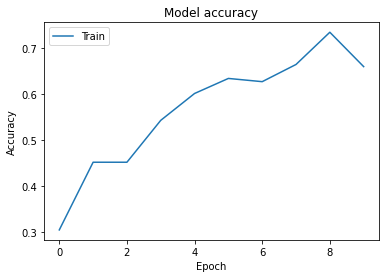

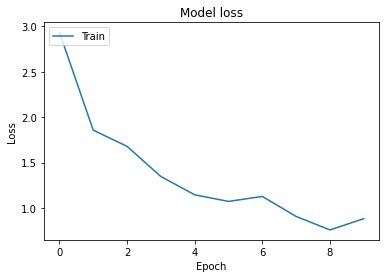

In [26]:
#畫出loss及accuracy的圖
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#from keras.utils import plot_model
#plot_model(model, to_file='model.png')

In [ ]:
#load訓練好的model
model = tf.keras.models.load_model('my_resnet_model.h5')

carrot


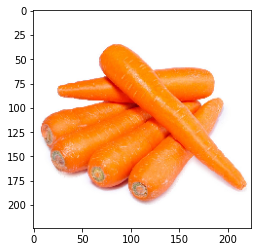

In [48]:
#test
#img_path = "./dataset/test/bok_choy/Bok-Choy-1024x582.jpg"

img_path = "./dataset/test/carrot/Uc10941361e594ba19d6207e8a7ef4638g.jpg"
#img_path = "./dataset/test/eggplant/5f57d16b9989f.image.jpg"
#img_path = "./dataset/test/green_bean/Green-bean-lime-633x326.jpg"
#img_path = "./dataset/test/tomato/101.jpg"


img = image.load_img(img_path, target_size=(224, 224))

plt.imshow(img)
img = image.img_to_array(img)/ 255.0
img = np.expand_dims(img, axis=0)  # 為batch添加第四維

#model.predict(img)
object_name = np.argmax(model.predict(img))
if object_name == 0:
    print("bok choy")
elif object_name == 1:
    print("carrot")
elif object_name == 2:
    print("eggplant")
elif object_name == 3:
    print("green bean")
elif object_name == 4:
    print("tomato")

In [49]:
#img_path = "./dataset/test/tomato/101.jpg"
#cls_list = ['bok_choy', 'carrot', "eggplant", "green_bean", "tomato"]

#img = image.load_img(img_path, target_size=(224, 224))
#x = image.img_to_array(img)
#x = np.expand_dims(x, axis = 0)
#pred = model.predict(x)[0]
#top_inds = pred.argsort()[:5]
#for i in top_inds:
    #print('    {:.3f}  {}'.format(pred[i], cls_list[i]))

    0.000  bok_choy
    0.000  eggplant
    0.000  green_bean
    0.000  tomato
    1.000  carrot
